# Supervised Learning


This notebook contains the code needed to generate plots for the supervised learning lecture.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

Create some toy model data from a cubic function - note we will only have one dimension (no intercept)

In [2]:
def toy_model(x):
    return 0.4*(x**3) - 0.2*(x**2) + 1.2*x \
        + 0.6*(np.random.rand(1 if isinstance(x, (int, float)) else len(x)) - 0.5)

Generate some data

In [3]:
N = 50
x = np.linspace(-1., 1., N)
y = toy_model(x)

In [4]:
X = x.reshape(-1, 1)
y = y.reshape(-1, 1)

Text(0, 0.5, 'y')

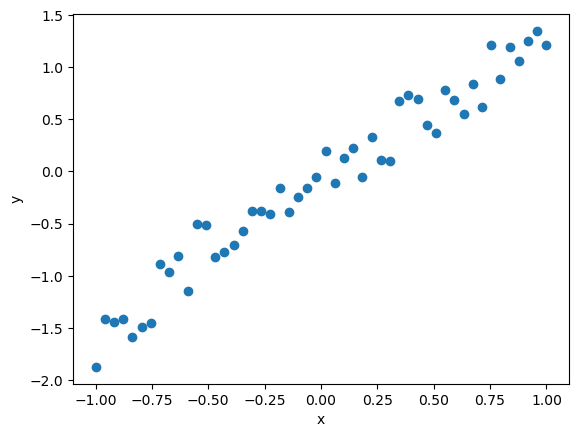

In [5]:
plt.scatter(x, y)
plt.xlabel("x")
plt.ylabel("y")

In [6]:
beta = np.zeros(2)

In [7]:
X.shape

(50, 1)

## Least squares estimate

In [8]:
beta_LS = np.dot(np.linalg.inv(X.T @ X), (X.T @ y))

In [9]:
coefficient_LS = beta_LS[0, 0]

In [10]:
print(f"Least squares estimate: coefficient {coefficient_LS:.4f}")

Least squares estimate: coefficient 1.4318


Text(0, 0.5, 'y')

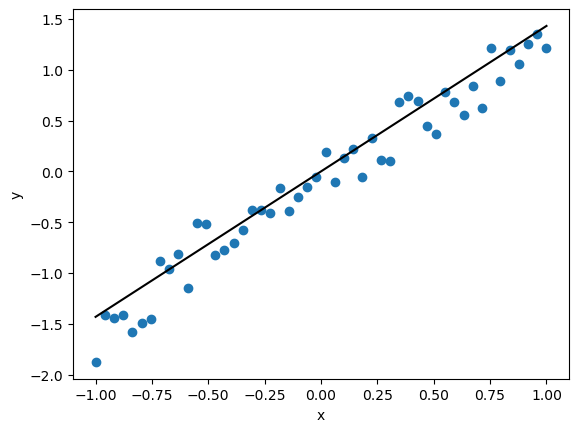

In [11]:
y_hat = X @ beta_LS
plt.scatter(x, y)
plt.plot(x, y_hat, color="black")
plt.xlabel("x")
plt.ylabel("y")

In [12]:
x.shape, y.shape

((50,), (50, 1))

Text(0, 0.5, 'y')

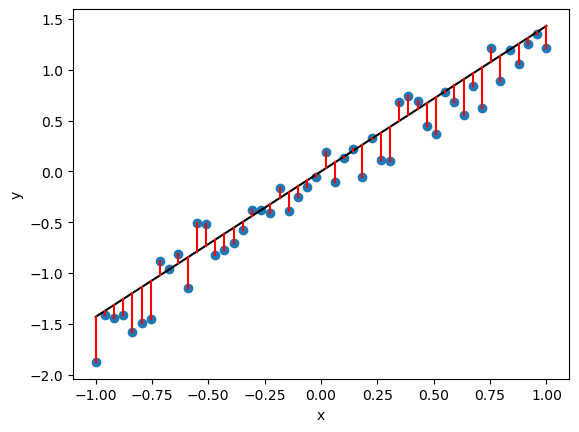

In [13]:
y_hat = X @ beta_LS
plt.scatter(x, y)
plt.plot(x, y_hat, color="black")
for i in range(len(y)):
    plt.plot([x[i], x[i]], [y[i],y_hat[i]], color="red")
plt.xlabel("x")
plt.ylabel("y")


## Gradient descent
For plotting, assume we know the intercept (=0) and we will just find how the loss function varies with respect to the slope (1D problem).

In [14]:
alpha = 0.5
# store intercept and coefficients for plotting
intercepts = []
coefficients = []
losses = []


# initialise beta_hat randomly
beta_hat = np.random.rand(1, 1)
beta_hat = np.array([[0.]])

for t in range(10):
    y_hat = X @ beta_hat 
    # compute direction of gradient
    d_L =  2*np.sum(X * (y_hat - y))/N
    
    # update
    beta_hat = beta_hat - alpha * d_L
    
    # store
    coefficients.append(beta_hat[0,0])
    losses.append(np.sum((y_hat - y)**2))



Text(0.5, 1.0, 'MSE')

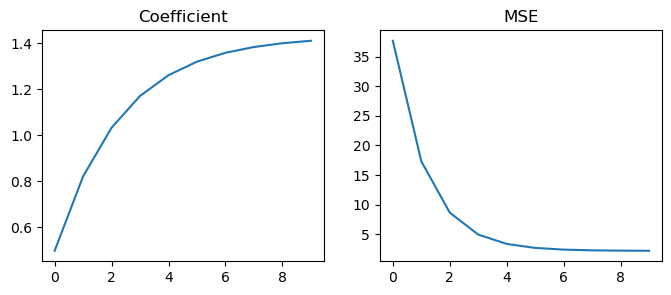

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(8, 3))
axs[0].plot(coefficients)
axs[0].set_title("Coefficient")


axs[1].plot(losses)
axs[1].set_title("MSE")

In [16]:
def L(beta):
    beta = beta.reshape(-1, 1)
    y_hat = X @ beta
    return np.sum((y_hat - y)**2)/N

In [17]:
def dL_dbeta(beta):
    beta = beta.reshape(-1, 1)
    y_hat = X @ beta 
    # compute direction of gradient
    return  2*np.sum(X * (y_hat - y))/N


In [18]:
betas = np.linspace(-2, 5, 30)
losses = np.array([L(b) for b in betas])

Plot loss function landscape

Text(0, 0.5, 'L')

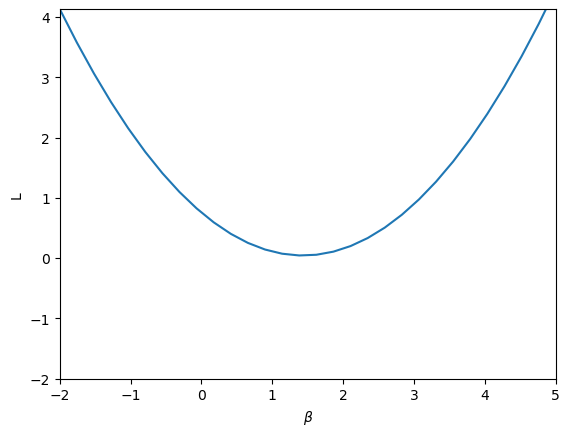

In [19]:
plt.plot(betas, losses)
plt.axis(xmin=betas[0], xmax=betas[-1], ymin=-2, ymax=losses[0])
plt.xlabel(r"$\beta$")
plt.ylabel("L")

In [20]:
step = 2.3

In [21]:
# Initialise beta with beta=0
beta = np.array([0.0])
loss = L(beta)
dL = dL_dbeta(beta)
print(loss, dL)

0.7544060171766782 -0.993511482321162


FileNotFoundError: [Errno 2] No such file or directory: 'plots/gradient_descent_00.png'

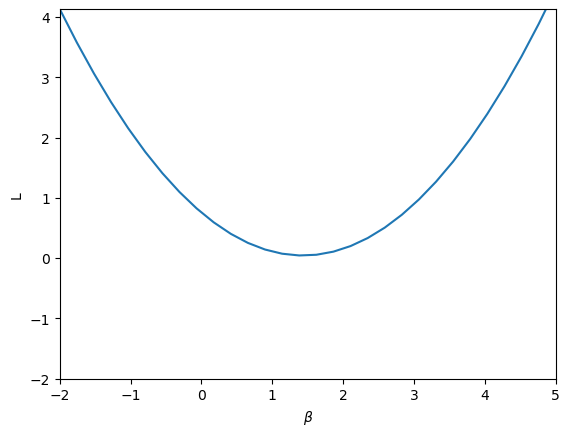

In [22]:
plt.plot(betas, losses)
plt.axis(xmin=betas[0], xmax=betas[-1], ymin=-2, ymax=losses[0])
plt.xlabel(r"$\beta$")
plt.ylabel("L")
plt.savefig("plots/gradient_descent_00.png")
plt.scatter(beta, loss, color="black", zorder=2)
plt.savefig("plots/gradient_descent_01.png")
# add gradient: y = mx + c, m = dL and when x=beta, y=loss,
c = loss-(dL*beta)
plt.plot(betas, dL*betas + c, color="black")
plt.savefig("plots/gradient_descent_02.png")
# Add the next point after taking a step in the direction of the gradient
print(beta-step*dL)
plt.scatter(beta - step*dL, dL*(beta - step*dL) + c, color="red", zorder=2)
plt.savefig("plots/gradient_descent_03.png")


In [ ]:
plot_no = 3


In [ ]:
for j in range(12):
    plot_no += 1

    # Take a step in direction of decreasing gradient (take big steps for showing this)
    beta = beta - step * dL
    loss = L(beta)
    dL = dL_dbeta(beta)
    
    print(loss, dL)
    fig, ax = plt.subplots(1, 1)
    plt.plot(betas, losses)
    plt.axis(xmin=betas[0], xmax=betas[-1], ymin=-2, ymax=losses[0])
    plt.xlabel(r"$\beta$")
    plt.ylabel("L")
    plt.scatter(beta, loss, color="black")
    # add gradient: y = mx + c, m = dL and when x=beta, y=loss,
    c = loss-(dL*beta)
    plt.plot(betas, dL*betas + c, color="black")
    plt.savefig(f"plots/gradient_descent_{plot_no:02g}.png")

    
    # Add new point
    plot_no += 1

    print(beta-step*dL)
    plt.scatter(beta - step*dL, dL*(beta - step*dL) + c, color="red", zorder=2) 
    plt.savefig(f"plots/gradient_descent_{plot_no:02g}.png")

    

## Overfitting

In [23]:
def toy_model(x):
    return 0.3*x**3 - 0.8*(x**2) + 1.2*x \
        + 0.6*(np.random.rand(1 if isinstance(x, (int, float)) else len(x)) - 0.5)

In [24]:
N = 50
x = np.linspace(-1., 1., N)
y = toy_model(x)
X = x.reshape(-1, 1)
y = y.reshape(-1, 1)

In [25]:
N_valid = 10
x_valid = np.linspace(-0.9, 0.9, N_valid)
y_valid = toy_model(x_valid)


Text(0, 0.5, 'y')

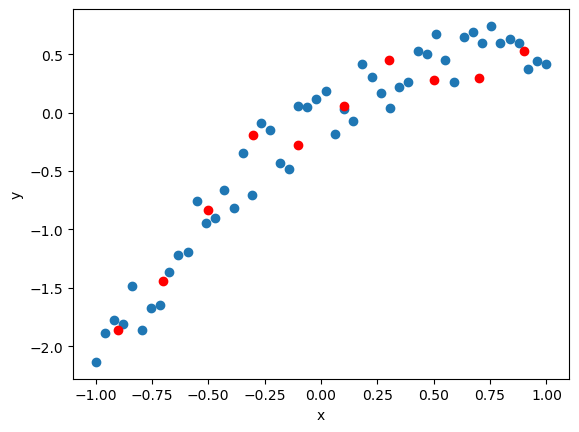

In [26]:
plt.scatter(x, y)
plt.scatter(x_valid, y_valid, color="red")

plt.xlabel("x")
plt.ylabel("y")

In [27]:
from sklearn import linear_model
reg = linear_model.LinearRegression()

reg.fit(X, y)

# print coefficients of model
print(reg.coef_)
print(reg.intercept_)

[[1.34491222]]
[-0.29214634]


In [28]:
x_domain = np.linspace(-1.5, 1.5, 100).reshape(-1, 1)
y_domain = reg.predict(x_domain)

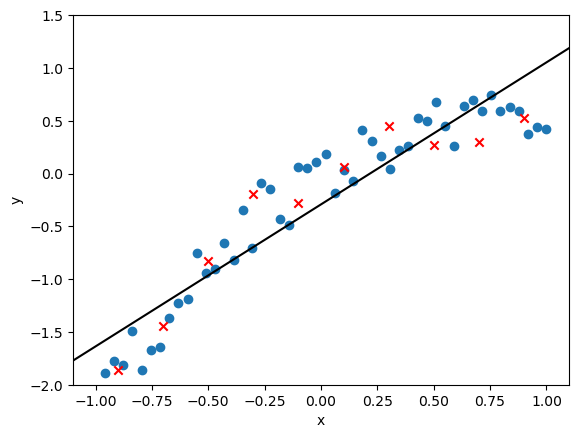

In [29]:
plt.scatter(x, y)
plt.plot(x_domain, y_domain, color="black")
plt.xlabel("x")
plt.ylabel("y")
plt.axis(ymin=-2, ymax=1.5, xmin=-1.1, xmax=1.1)
plt.scatter(x_valid, y_valid, color="red", marker="x")


## Polynomial?

In [30]:
def polynomial_array(X, degree=2):
    """Returns array stacked of degree polynomial"""
    return np.hstack([X**i for i in range(1, degree+1)])

In [31]:
degree=25
X_poly = polynomial_array(X, degree=degree)

In [32]:
reg_poly = linear_model.LinearRegression()

reg_poly.fit(X_poly, y)

x_domain_poly =  polynomial_array(x_domain, degree=degree)
y_domain = reg_poly.predict(x_domain_poly)
X_poly = polynomial_array(X, degree=degree)
rmse = np.sqrt(np.mean((reg_poly.predict(X_poly)-y)**2))
# validation data
x_valid_poly = polynomial_array(x_valid.reshape(-1, 1), degree=degree)
rmse_valid = np.sqrt(np.mean((reg_poly.predict(x_valid_poly)-y_valid.reshape(-1, 1))**2))


Text(1.01, -1.7, 'RMSE training: 0.113')

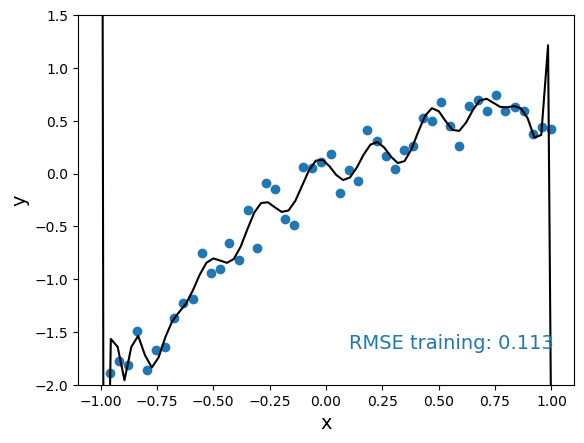

In [33]:
plt.scatter(x, y)
plt.plot(x_domain, y_domain, color="black")
plt.xlabel("x", fontsize=14)
plt.ylabel("y", fontsize=14)
plt.axis(ymin=-2, ymax=1.5, xmin=-1.1, xmax=1.1)
plt.text(1.01, -1.7, f"RMSE training: {rmse:.3f}",
         fontsize=14, color="#1f77b4", horizontalalignment='right',
        verticalalignment='bottom')

Text(1.01, -1.9, 'RMSE validation: 0.212')

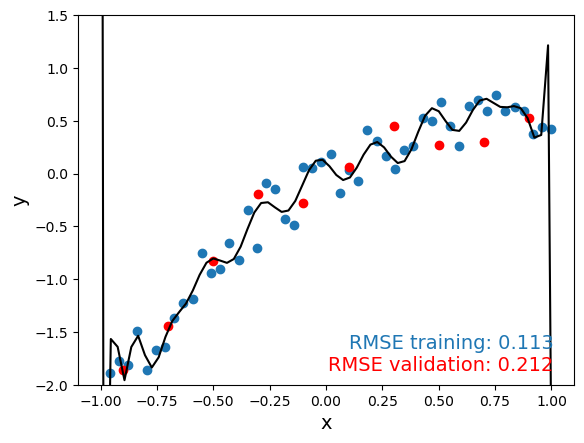

In [34]:
plt.scatter(x, y)
plt.plot(x_domain, y_domain, color="black")
plt.xlabel("x", fontsize=14)
plt.ylabel("y", fontsize=14)
plt.axis(ymin=-2, ymax=1.5, xmin=-1.1, xmax=1.1)
plt.text(1.01, -1.7, f"RMSE training: {rmse:.3f}",
         fontsize=14, color="#1f77b4", horizontalalignment='right',
        verticalalignment='bottom')

plt.scatter(x_valid, y_valid, color="red")
plt.text(1.01, -1.9, f"RMSE validation: {rmse_valid:.3f}", 
         fontsize=14, color="red", horizontalalignment='right',
        verticalalignment='bottom')


In [35]:
training_err = []
valid_err = []
for degree in range(1, 30):
    X_poly = polynomial_array(X, degree=degree)
    reg_poly = linear_model.LinearRegression()

    reg_poly.fit(X_poly, y)

    x_domain_poly =  polynomial_array(x_domain, degree=degree)
    y_domain = reg_poly.predict(x_domain_poly)
    X_poly = polynomial_array(X, degree=degree)
    rmse = np.sqrt(np.mean((reg_poly.predict(X_poly)-y)**2))
    training_err.append(rmse)
    # validation data
    x_valid_poly = polynomial_array(x_valid.reshape(-1, 1), degree=degree)
    rmse_valid = np.sqrt(np.mean((reg_poly.predict(x_valid_poly)-y_valid.reshape(-1, 1))**2))
    valid_err.append(rmse_valid)



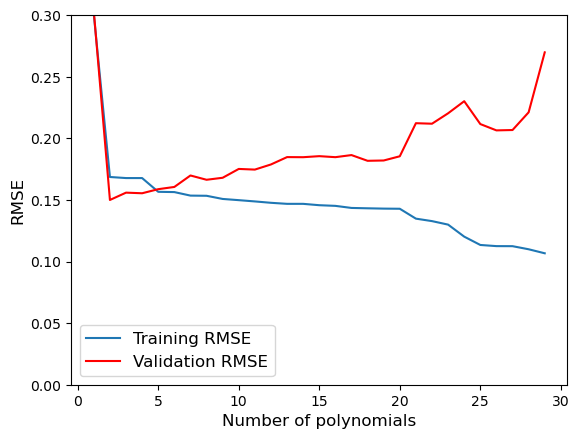

In [41]:
plt.plot(range(1, 30), training_err, label="Training RMSE")
plt.plot(range(1, 30), valid_err, color="red", label="Validation RMSE")
plt.axis(ymax=.3, ymin=0.)
plt.ylabel("RMSE", fontsize=12)
plt.xlabel("Number of polynomials", fontsize=12)
plt.legend(fontsize=12)